# Домашнее задание 1: Обработка и анализ изображений

Цель: Применить базовые методы обработки изображений для улучшения качества и выделения ключевых признаков.

## Импорты и вспомогательные функции

In [1]:
import cv2
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
from IPython.display import display

from typing import Union, Optional

Напишем 2 вспомогательные функции для отображения одного и нескольких изображений, хранящихся в виде numpy-массива.

In [2]:
def show_image(
    image: Union[cv2.Mat, np.ndarray], 
    ax=None, 
    title=''
):
    """ Отображает изображение, прочитанное с помощью OpenCV и хранящееся в виде массива. """

    if ax is None:
        ax = plt.gca()

    if len(image.shape) == 2:
        ax.imshow(image, cmap='gray')
    else:
        ax.imshow(image)

    if title:
        ax.set_title(title)
        
    ax.set_axis_off()


def show_few_images(
    images: list, 
    rows: int, 
    cols: int, 
    figsize: tuple,
    titles: Optional[list] = None
):
    """ Отображает несколько изобржажений, используя plt.subplots(). """

    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    for i, (ax, img) in enumerate(zip(axes.flatten(), images)):
        show_image(img, ax=ax)
        if titles:
            ax.set_title(titles[i])

## Задание 1. Загрузка и отображение изображения

* Выберите цветное изображение по вашему выбору (например, природа, архитектура, портрет).
* С помощью библиотек OpenCV или PIL загрузите изображение в программу.
* Отобразите исходное изображение.

**Решение:**

Сначала воспользуемся библиотекой PIL. Для чтения изображения применим метод `.open()` и передадим ему путь к изображению. Отображение осуществим двумя способами: 

1. При помощи метода `.show()`, который откроет изображение в новом окне на компьютере.
2. При помощи функции `display` из модуля `IPython.display`, который выведет изображение прямо в Jupyter Notebook. 

In [3]:
path = 'data/image_2.png'  # путь к изображению
image = Image.open(path)  # чтение изображения с помощью библиотеки PIL
image.show()  # отображение в новом окне

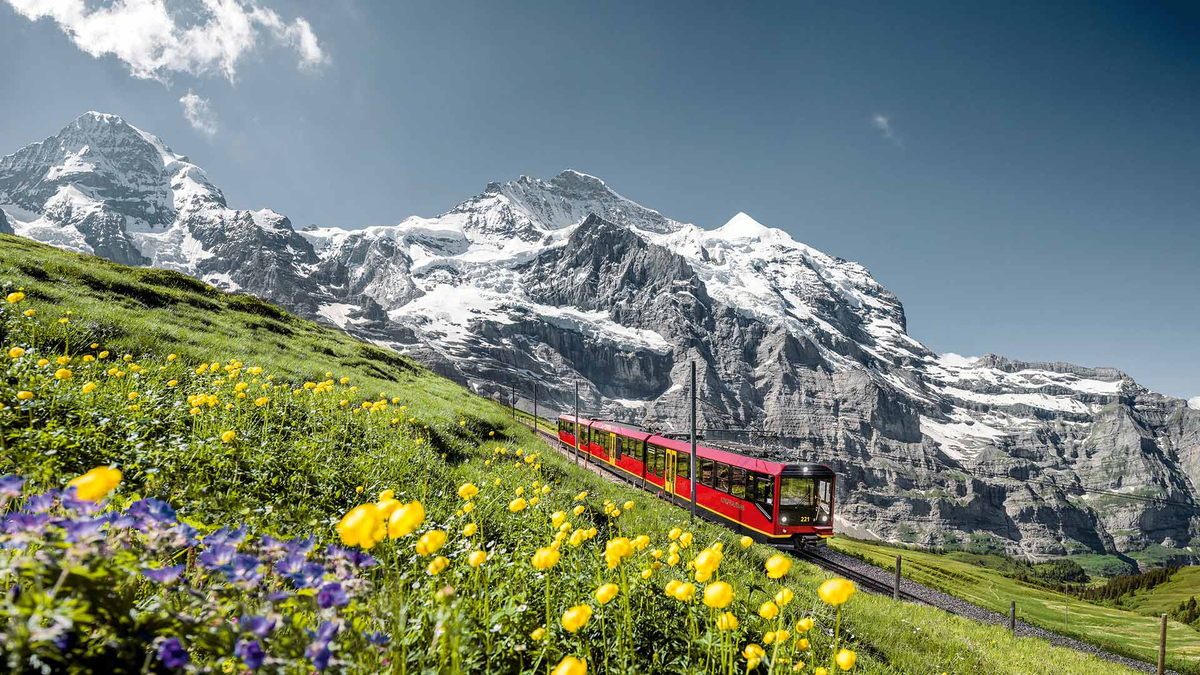

In [4]:
display(image)  # отображение прямо в Jupyter Notebook

Опробуем также библиотеку OpenCV. Для загрузки изображения в программу используем функцию `cv2.imread`, передав в неё путь к изображению. Далее поменяем местами цветовые каналы из BGR в RGB, а затем отобразим изображение при помощи вспомогательной функции `show_image`, которая использует библиотеку matplotlib.

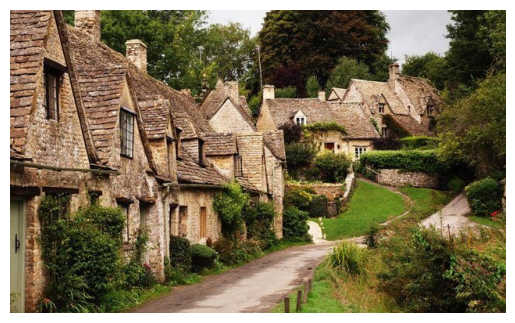

In [5]:
path = 'data/image_1.jpg'  # путь к изображению
image = cv2.imread(path)  # чтение изображения с помощью библиотеки OpenCV
image = image[:, :, ::-1]  # переход из BGR на RGB
show_image(image)  # отображение

## Задание 2. Преобразование цветовых пространств
* Преобразуйте изображение из RGB в Grayscale и HSV.
* Отобразите каждое из полученных изображений.
* Постройте гистограммы яркости для исходного и серого изображений.

**Решение:**

Для преобразования изображений из одного цветового пространства в другое используем функцию `cv2.cvtColor`, в которую необходимо передать само изображение и код цветового пространства. В данном случае, будем использовать следующие коды:
- `cv2.COLOR_BGR2RGB`
- `cv2.COLOR_RGB2GRAY`
- `cv2.COLOR_RGB2HSV`

Отобразим результат при помощи вспомогательной функции `show_few_images`, которая использует библиотеку matplotlib. Как и ожидалось, видим, что изображения отображаются по-разному, так как находятся в разных цветовых пространствах. 

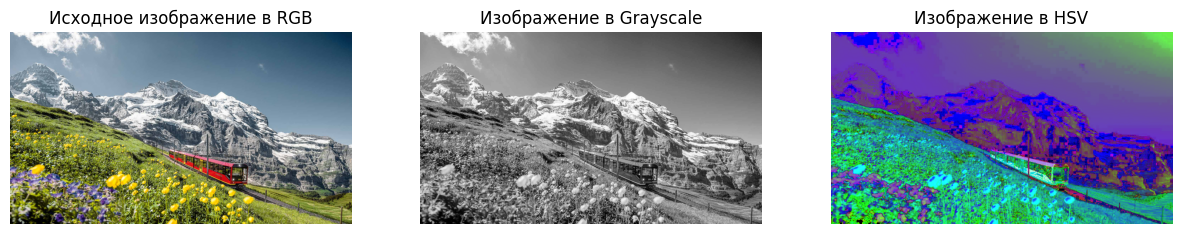

In [6]:
path = 'data/image_2.png'  # путь к изображению
image = cv2.imread(path)  # чтение изображения
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # преобразование из BGR в RGB
image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)  # преобразование из RGB в Grayscale
image_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)  # преобразование из RGB в HSV

# отображение результата
show_few_images(
    images=[image, image_gray, image_hsv], 
    rows=1, 
    cols=3, 
    figsize=(15, 8), 
    titles=['Исходное изображение в RGB', 'Изображение в Grayscale', 'Изображение в HSV']
)

Чтобы вычислить гистограммы яркости изображений, будем использовать функцию `cv2.calcHist`. Исходную 3-канальную RGB-картинку предварительно разделим на 3 отдельных канала с помощью функции `cv2.split`. Проанализируем результат:

- RGB-каналы исходного изображения имеют разные распределения яркости. Большинство значений красного канала принадлежат диапазону яркости [30, 150], зеленого - диапазону [50, 170], а синего - диапазону [100, 200]. Также видим у синего канала пик при значении интенсивности 0, что говорит о большом числе пикселей с отсутствием синей компоненты в цвете.
- Гистограмма яркости серого изображения показывает, что большинство пикселей имеют интенсивность от 50 до 180. Думаю, можно сказать, что изображение обладает средней яркостью.

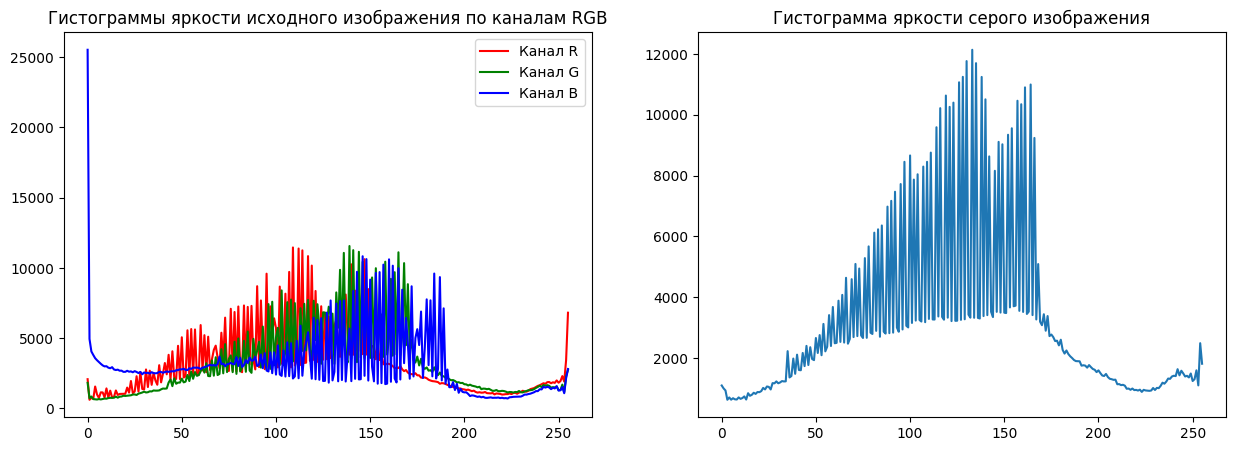

In [7]:
rgb_channels = cv2.split(image)  # разбиение на каналы r, g, b
rgb_histograms = [cv2.calcHist(rgb_channels, [i], None, [256], [0, 256]) for i in range(len(rgb_channels))]  # вычисление гистограмм исходного изображения
gray_hist = cv2.calcHist([image_gray], [0], None, [256], [0, 256])  # вычисление гистограммы grayscale изображения

# отображение результата
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
for hist, name in zip(rgb_histograms, list('rgb')):
    axes[0].plot(hist, color=name, label=f'Канал {name.upper()}')
    axes[0].legend()
    axes[0].set_title('Гистограммы яркости исходного изображения по каналам RGB')
axes[1].plot(gray_hist)
axes[1].set_title('Гистограмма яркости серого изображения');

## Задание 3. Фильтрация изображений:
* Примените к серому изображению следующие фильтры:
    * Гауссово сглаживание с разными значениями σ (сигма).
    * Медианный фильтр с разными размерами ядра.
    * Фильтр Лапласа для повышения резкости.
* Отобразите результаты фильтрации и сравните их визуально.

**Решение:**

Для гауссова сглаживания используем функцию `cv2.GaussianBlur`. Выберем размер ядра (7, 7), а параметр $\sigma$ будем варьировать, перебирая значения 0.05, 0.5, 1, 2. Отобразив результат, видим, что с увеличением $\sigma$ возрастает степень размытия изображения. Это ожидаемо, так как $\sigma$ определяет стандартное отклонение ядра, то есть разброс.

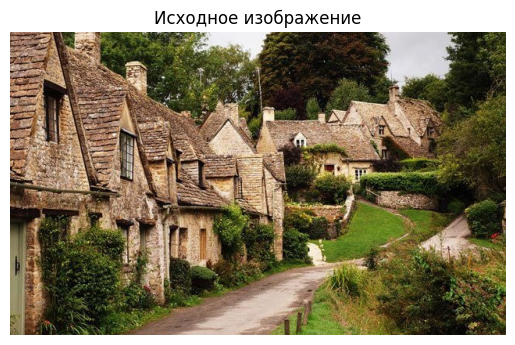

In [8]:
path = 'data/image_1.jpg' # путь к изображению
image = cv2.imread(path)  # чтение изображения
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # преобразование из BGR в Grayscale

show_image(image[:, :, ::-1], title='Исходное изображение')

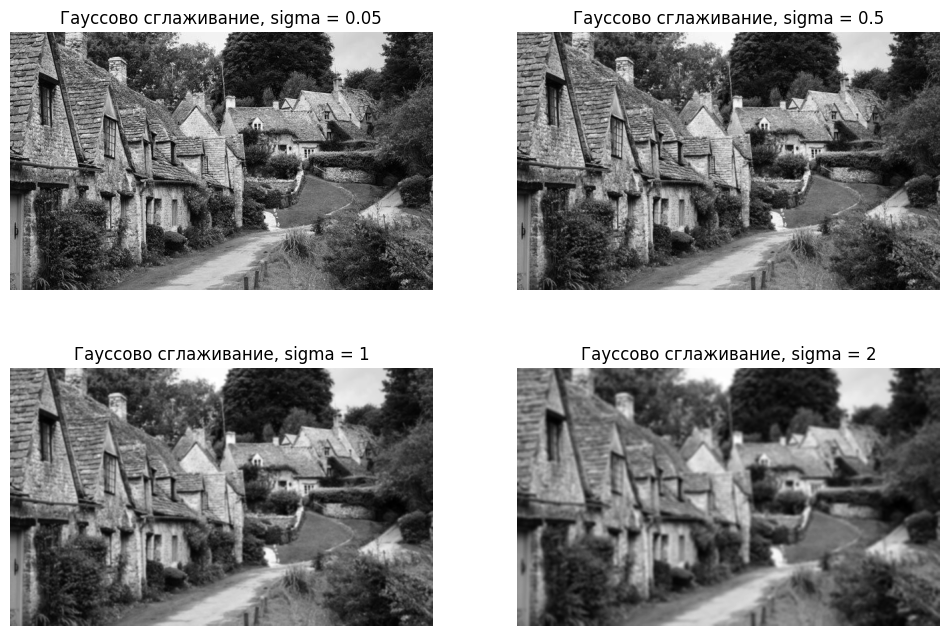

In [9]:
# применение гауссова сглаживания с разными значениями сигма
kernel = (7, 7)
sigmas = [0.05, 0.5, 1, 2]
blurred_images = [cv2.GaussianBlur(image_gray, ksize=kernel, sigmaX=sigma) for sigma in sigmas]

# отображение результата
show_few_images(
    images=blurred_images, 
    rows=2, 
    cols=2, 
    figsize=(12, 8), 
    titles=[f'Гауссово сглаживание, sigma = {sigma}' for sigma in sigmas]
)

Для применения медианного фильтра используем функцию `cv2.medianBlur`. Испробуем разные размеры ядра: 3, 5, 7, 13. Важно, что размер ядра должен быть нечетным числом. Видим, что с увеличением размера увеличивается и степень размытия изображения. Медианный фильтр позволяет эффективно избавляться от сильных шумов на изображении (импульсный шум, соль-перец). Однако при больших размерах ядра теряется много мелких деталей изображения.

Сравнивая Гауссов и медианный фильтры, видим, что они работают по-разному. Фильтр Гаусса дает более плавное размытие, лучше сохраняя границы. 

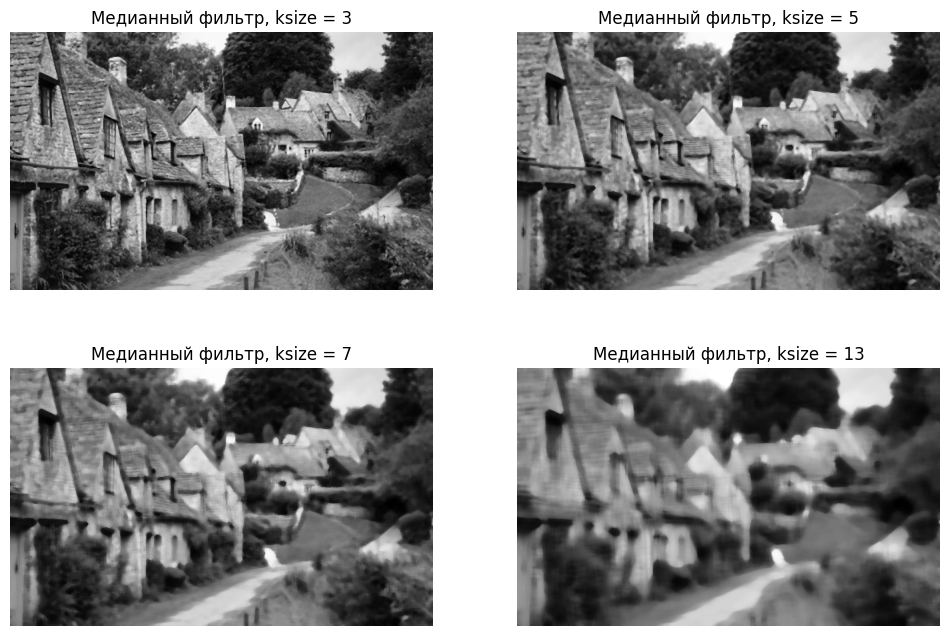

In [10]:
# применение медианного фильтра с разными значениями ядра
ksizes = [3, 5, 7, 13]
blurred_images = [cv2.medianBlur(image_gray, ksize=k) for k in ksizes]

# отображение результата
show_few_images(
    images=blurred_images, 
    rows=2, 
    cols=2, 
    figsize=(12, 8), 
    titles=[f'Медианный фильтр, ksize = {k}' for k in ksizes]
)

Для применения фильтра Лапласа используем функцию `cv2.Laplacian`. Реализуем 2 варианта: запустим функцию на исходном изображении и на сглаженном гауссовым фильтром, а затем сравним результат. Видим, что в первом случае подсветилось довольно много очень мелких деталей (из-за сложности текстур), а во втором больший акцент сделан на основные контуры изображения: очертания домов, дороги, деревьев.

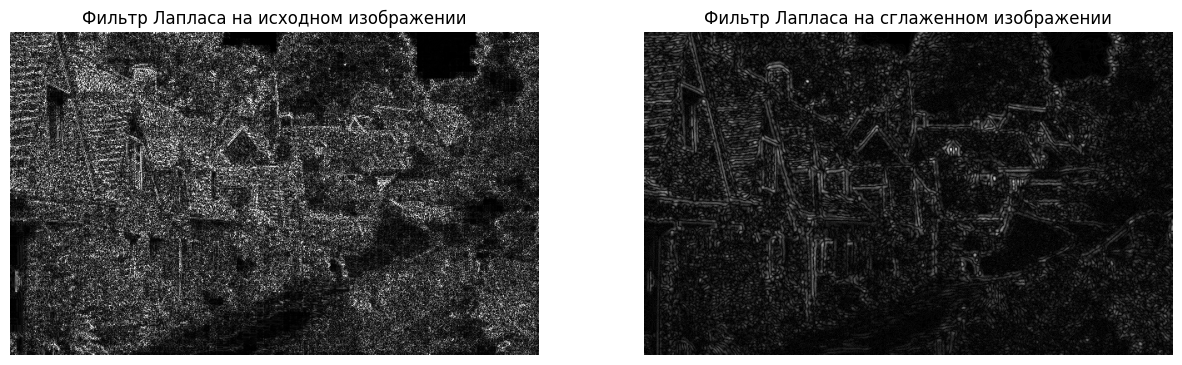

In [11]:
# применение фильтра Лапласа

# на исходном изображении
sharpened_image = cv2.Laplacian(image_gray, ddepth=cv2.CV_64F)
abs_sharpened_image = cv2.convertScaleAbs(sharpened_image)

# на сглаженном изображении
sharpened_blurred_image = cv2.Laplacian(cv2.GaussianBlur(image_gray, (7,7), 0), ddepth=cv2.CV_64F)
abs_sharpened_blurred_image = cv2.convertScaleAbs(sharpened_blurred_image)

# отображение результата
show_few_images(
    images=[abs_sharpened_image, abs_sharpened_blurred_image], 
    rows=1, 
    cols=2, 
    figsize=(15, 10),
    titles=['Фильтр Лапласа на исходном изображении', 'Фильтр Лапласа на сглаженном изображении']
)

## Задание 4. Выделение краев и углов:
* Используйте оператор Собеля для определения горизонтальных и вертикальных градиентов.
* Примените алгоритм Кэнни для обнаружения краев.
* Используйте детектор углов Harris или Shi-Tomasi для выявления угловых точек.
* Наложите результаты на исходное изображение и отобразите.

**Решение:**

Прежде всего переведем изображение в Grayscale и сгладим фильтром Гаусса с ядром (5,5).

Оператор Собеля в OpenCV - это функция `cv2.Sobel`. Используем ее для вычисления градиентов изображения в направлении X и Y. Затем воспользуемся функцией `cv2.convertScaleAbs`, которая преобразует значения пикселей входного изображения в 8-битные беззнаковые целые числа. Наконец, вычислим приближение градиента как взвешенную сумму градиентов по обоим направлениям.

В результате применения оператора Собеля получим выделенные границы у изображения, причем градиент в направлении X дает вертикальные границы, градиент в направлении Y - горизонтальные, а приближенный градиент - все границы.

In [12]:
path = 'data/image_1.jpg'  # путь к изображению
image = cv2.imread(path)  # чтение изображения
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # преобразование из BGR в RGB
image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)  # преобразование из RGB в Grayscale
image_gray_blurred = cv2.GaussianBlur(image_gray, ksize=(5,5), sigmaX=0)  # применение гассова сглаживания

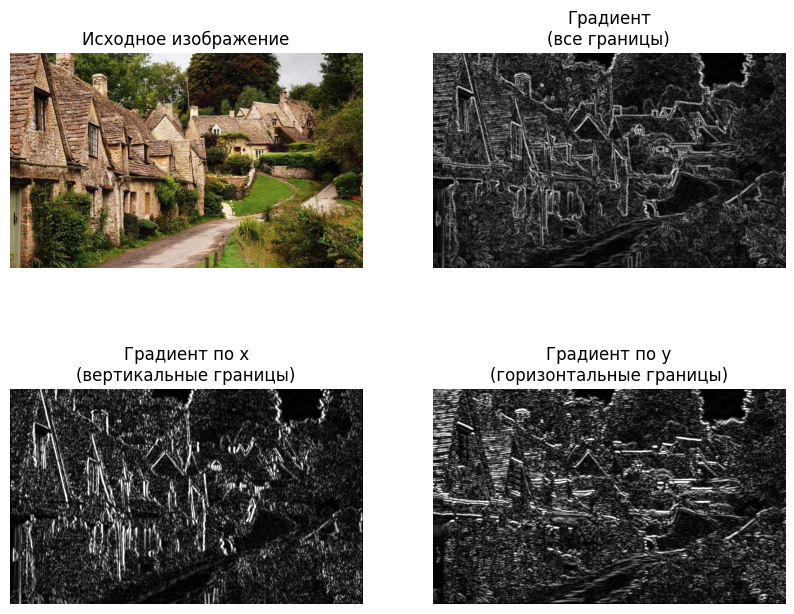

In [13]:
# использование оператора Собеля
grad_x = cv2.Sobel(image_gray_blurred, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=3)
grad_y = cv2.Sobel(image_gray_blurred, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=3)
abs_grad_x = cv2.convertScaleAbs(grad_x)
abs_grad_y = cv2.convertScaleAbs(grad_y)
grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)

# отображение результата
show_few_images(
    images=[image, grad, abs_grad_x, abs_grad_y], 
    rows=2, 
    cols=2, 
    figsize=(10, 8),
    titles=['Исходное изображение', 'Градиент\n(все границы)', 'Градиент по x\n(вертикальные границы)', 'Градиент по y\n(горизонтальные границы)']
)

Оператор Кэнни в OpenCV - это функция `cv2.Canny`. Используем ее для поиска краев на изображении, передав в функцию серое изображение и эмпирически выбранные пороги для гистерезиса. Помним, что внутри алгоритма Кэнни уже используется фильтр Гаусса для сглаживания. Но в данном случае, как было выяснено опытным путем, лучше дополнительно провести предварительное сглаживание, так как на изображении много мелких деталей.

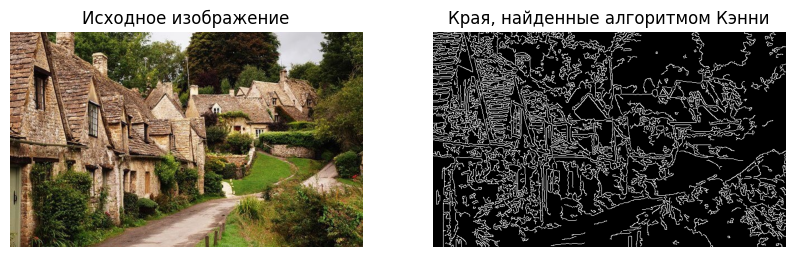

In [14]:
# применение алгоритма Кэнни
canny_edges = cv2.Canny(image_gray_blurred, 70, 170)

# отображение результата
show_few_images(
    images=[image, canny_edges], 
    rows=1, 
    cols=2, 
    figsize=(10, 5),
    titles=['Исходное изображение', 'Края, найденные алгоритмом Кэнни']
)

Используем детекторы Харриса и Ши-Томаси для поиска углов на изображении: функции `cv2.cornerHarris` и `cv2.goodFeaturesToTrack`.

- Для детектора Харриса установим параметры blockSize = 3 (размер окрестности) и k = 0.08 (параметр штрафа).
- Для детектора Ши-Томаси выберем параметры maxCorners = 50 (максимальное число углов), qualityLevel = 0.01 (минимально допустимое качество углов) и minDistance = 5 (минимально возможное расстояние между углами).

Сравнивая результаты работы методов, видим, что детектор Харриса нашел больше углов, но многие из них возникли из-за шумов на исходном изображении. Детектор Ши-Томаси, в свою очередь, нашел меньше углов, но они более репрезентативные.

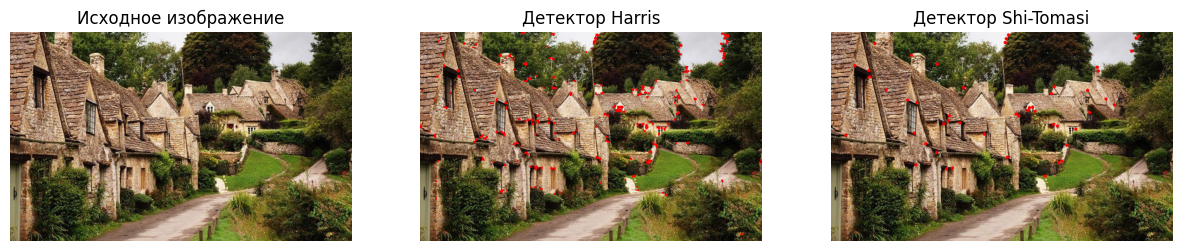

In [15]:
# применение детекторов углов Harris и Shi-Tomasi

# Harris
harris_corners = cv2.cornerHarris(np.float32(image_gray_blurred), blockSize=3, ksize=3, k=0.08)
harris_corners = cv2.dilate(harris_corners, None)
image_harris_corners = image.copy()
image_harris_corners[harris_corners > 0.04*harris_corners.max()] = [255, 0, 0]

# Shi-Tomasi
shitomasi_corners = cv2.goodFeaturesToTrack(image_gray_blurred, maxCorners=50, qualityLevel=0.01, minDistance=5)
shitomasi_corners = np.int0(shitomasi_corners)
image_shitomasi_corners = image.copy()
for i in shitomasi_corners:
    x, y = i.ravel()
    cv2.circle(image_shitomasi_corners, (x, y), 3, 255, -1)

# отображение результата
show_few_images(
    images=[image, image_harris_corners, image_shitomasi_corners],
    rows=1,
    cols=3,
    figsize=(15, 5),
    titles=['Исходное изображение', 'Детектор Harris', 'Детектор Shi-Tomasi']
)

## Задание 5. Морфологические операции:
* Бинаризуйте серое изображение с помощью пороговой сегментации.
* Примените операции эрозии и дилатации с различными структурными элементами.
* Отобразите результаты и объясните эффект каждой операции.

**Решение:**

Для начала осуществим предварительные преобразования: перевод картинки в Grayscale и гауссово сглаживание.

In [16]:
path = 'data/image_3.jpg'  # путь к изображению
image = cv2.imread(path)  # чтение изображения
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # преобразование из BGR в Grayscale
image_gray = cv2.GaussianBlur(image_gray, ksize=(5,5), sigmaX=0)  # применение гассова сглаживания

К получившемуся серому изображению применим функцию `cv2.threshold` с флагом `cv2.THRESH_BINARY` для простой бинарной сегментации. В качестве порога выберем значение 100.

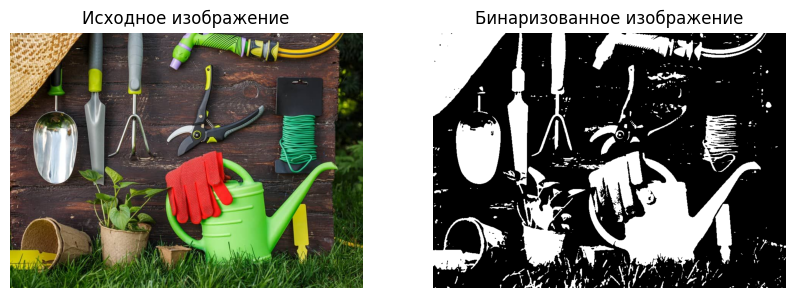

In [17]:
# пороговая сегментация
_, thresh = cv2.threshold(image_gray, 100, 255, cv2.THRESH_BINARY)

# отображение результата
show_few_images(
    images=[image[:, :, ::-1], thresh], 
    rows=1, 
    cols=2, 
    figsize=(10, 5),
    titles=['Исходное изображение', 'Бинаризованное изображение']
)

Используем функцию `cv2.morphologyEx` для осуществления морфологических операций. Для эрозии передадим флаг `cv2.MORPH_ERODE`, для дилатации - `cv2.MORPH_DILATE`. Также будем использовать разные структурные элементы: матрицы из единиц различного размера (3, 5 и 8). Проанализируем результаты:

- При эрозии границы объектов как бы съедаются, а также убираются мелкие белые области. С увеличением размера ядра эффект также увеличивается: с изображения стираются тонкие линии, объекты сужаются, так как чем больше ядро, тем большей должна быть белая область вокруг пикселя, чтобы он сохранился в результате применения операции.

- При дилатации наблюдается противоположный эффект: происходит усиление краев и увеличение объектов за счет наращивания пикселей возле границ. С ростом размера ядра растет и степень расширения. Благодаря дилатации также можно избавиться от мелких черных областей, но при этом усиливаются белые шумные области.

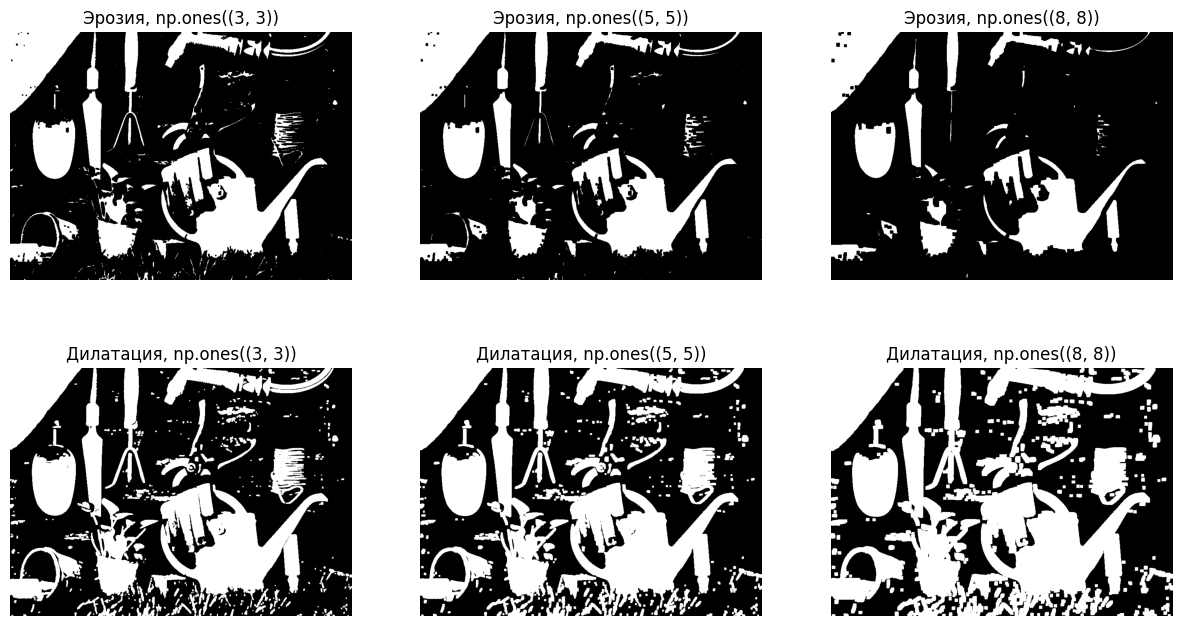

In [18]:
# применение эрозии и дилатации с разными структурными элементами
kernels = [np.ones((i,i), np.uint8) for i in [3, 5, 8]]
eroded_images = [cv2.morphologyEx(thresh, op=cv2.MORPH_ERODE, kernel=kernel) for kernel in kernels]
dilated_images = [cv2.morphologyEx(thresh, op=cv2.MORPH_DILATE, kernel=kernel) for kernel in kernels]

# отображение результата
show_few_images(
    images=eroded_images+dilated_images, 
    rows=2, 
    cols=3, 
    figsize=(15, 8),
    titles=[f'Эрозия, np.ones({kernel.shape})' for kernel in kernels]+[f'Дилатация, np.ones({kernel.shape})' for kernel in kernels]
)